In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  

import scipy.stats as stats  
import statsmodels.api as sm  

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 50)  

sns.set(style="whitegrid")  

%matplotlib inline

In [2]:
df = pd.read_excel('cwc_euro_teams.xlsx')
print(df)

               Club  # Pl   Age  Poss  MP  Starts   Min  90s  Gls  Ast  ...   
0       Real Madrid    30  26.6  60.4  38     418  3420   38   78   55  ...  \
1   Atlético Madrid    24  28.4  52.6  38     418  3420   38   68   51  ...   
2   Manchester City    30  26.8  61.3  38     418  3420   38   71   51  ...   
3           Chelsea    29  23.7  57.1  38     418  3420   38   61   47  ...   
4             Inter    26  29.4  59.7  38     418  3420   38   76   57  ...   
5          Juventus    29  24.6  57.2  38     418  3420   38   56   40  ...   
6     Bayern Munich    29  27.7  67.9  34     374  3060   34   96   66  ...   
7          Dortmund    28  26.6  58.9  34     374  3060   34   69   56  ...   
8         Paris S-G    28  23.6  68.0  34     374  3060   34   89   69  ...   
9           Benfica    35  25.8  58.0  34     374  3060   34   81   58  ...   
10            Porto    32  24.2  61.7  34     374  3060   34   65   44  ...   

    Gls.1  Ast.1  G+A.1  G-PK.1  G+A-PK  xG.1  xAG.

Projected Attacking Threats at the Club World Cup: Anticipated Goals and Assists Excluding Penalties

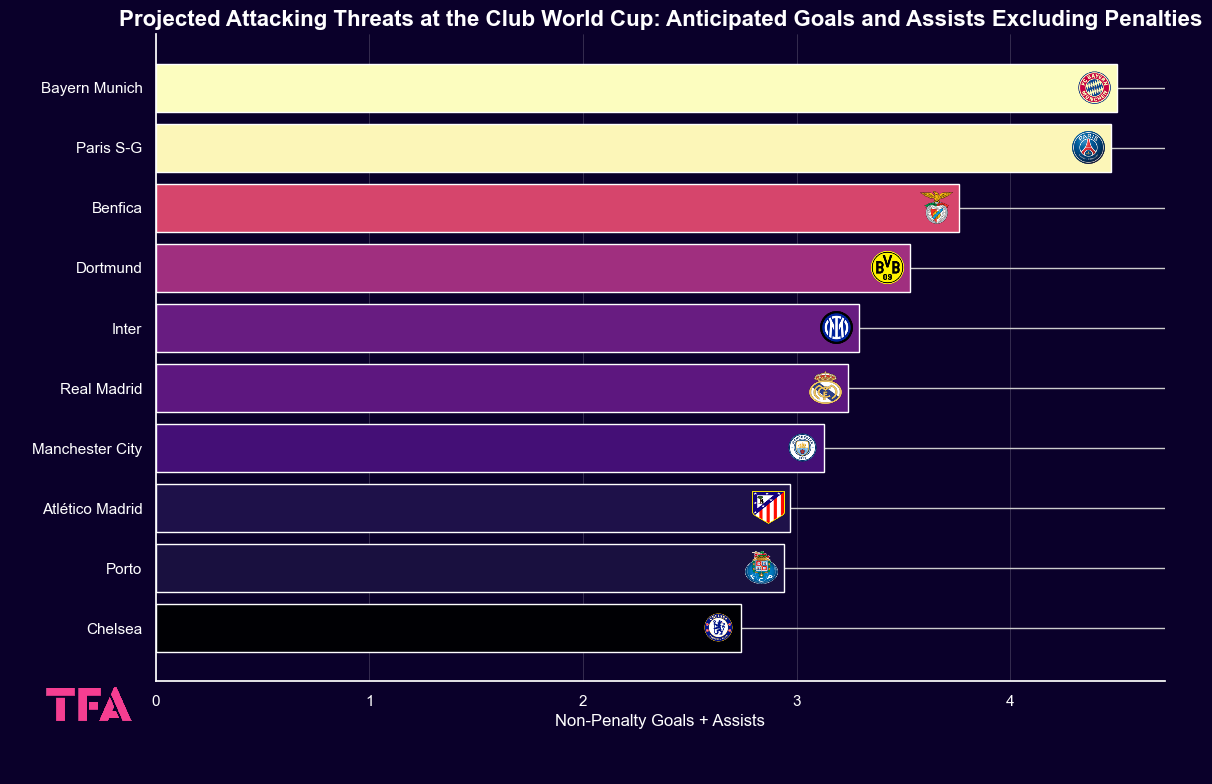

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

df = df.sort_values("G+A-PK", ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

norm = plt.Normalize(df["G+A-PK"].min(), df["G+A-PK"].max())
colors = plt.cm.magma(norm(df["G+A-PK"]))

bars = ax.barh(df["Club"], df["G+A-PK"], color=colors)
ax.set_xlabel('Non-Penalty Goals + Assists', fontsize=12, color='white')
ax.set_title('Projected Attacking Threats at the Club World Cup: Anticipated Goals and Assists Excluding Penalties',
             fontsize=16, color='white', weight='bold')
ax.invert_yaxis()

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(True, axis='x', color='white', linestyle='-', linewidth=0.4, alpha=0.3)

logos_path = "D:/Work/Data Analysis TFA/08 CWC European Teams/logos/"

for i, club in enumerate(df['Club']):
    logo_path = os.path.join(logos_path, f"{club}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA")  
        logo_img = logo_img.resize((80, 80))  
        imagebox = OffsetImage(logo_img, zoom=0.290) 
        ab = AnnotationBbox(imagebox, (df['G+A-PK'].iloc[i], i),
                            frameon=False, box_alignment=(1.2, 0.5), xycoords='data')
        ax.add_artist(ab)



tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Forecasting Non-Penalty Expected Threats: Evaluating xG, npxG, xAG and Combined Impact Ahead of the Competition

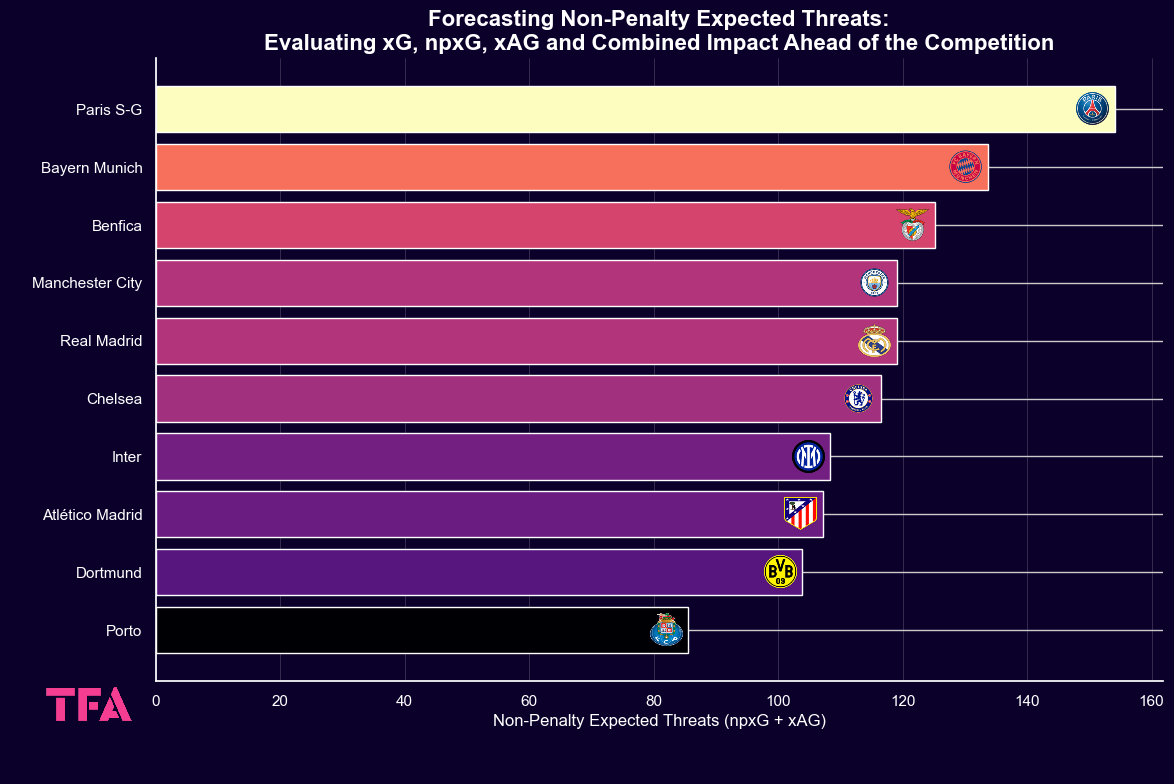

In [39]:
df['Combined_Impact'] = df['npxG'] + df['xAG']
df = df.sort_values("Combined_Impact", ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

norm = plt.Normalize(df["Combined_Impact"].min(), df["Combined_Impact"].max())
colors = plt.cm.magma(norm(df["Combined_Impact"]))

bars = ax.barh(df["Club"], df["Combined_Impact"], color=colors)
ax.set_xlabel('Non-Penalty Expected Threats (npxG + xAG)', fontsize=12, color='white')
ax.set_title('Forecasting Non-Penalty Expected Threats:\nEvaluating xG, npxG, xAG and Combined Impact Ahead of the Competition',
             fontsize=16, color='white', weight='bold')
ax.invert_yaxis()

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(True, axis='x', color='white', linestyle='-', linewidth=0.4, alpha=0.3)

logos_path = "D:/Work/Data Analysis TFA/08 CWC European Teams/logos/"

for i, club in enumerate(df['Club']):
    logo_path = os.path.join(logos_path, f"{club}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA")  
        logo_img = logo_img.resize((80, 80))  
        imagebox = OffsetImage(logo_img, zoom=0.290) 
        ab = AnnotationBbox(imagebox, (df['Combined_Impact'].iloc[i], i),
                            frameon=False, box_alignment=(1.2, 0.5), xycoords='data')
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()


Expected Ball Progression Across Continents: Which Teams Are Poised to Lead in Progressive Carries and Passes?

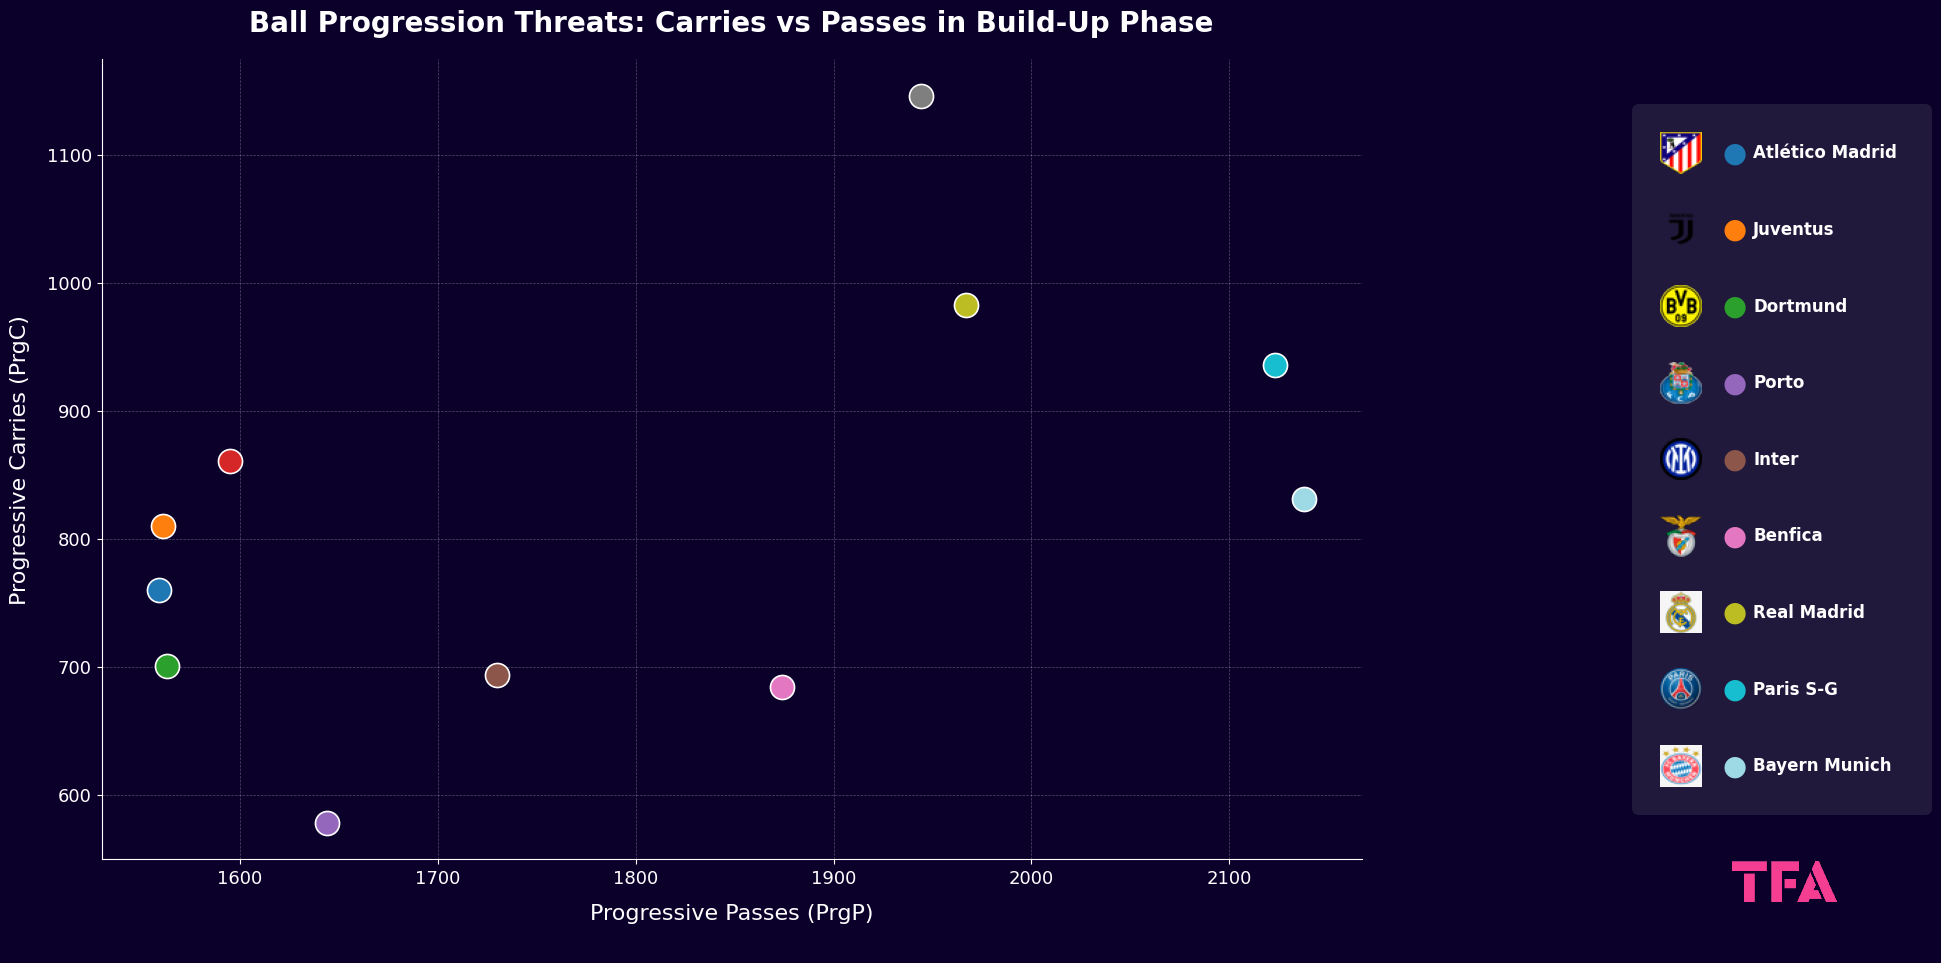

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea, HPacker, VPacker

df = df.sort_values("PrgP", ascending=True).reset_index(drop=True)

x = df["PrgP"].values
y = df["PrgC"].values
teams = df["Club"].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(18, 10))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

colors = plt.cm.tab20(np.linspace(0, 1, len(teams)))
logos_path = "D:/Work/Data Analysis TFA/08 CWC European Teams/logos/"

legend_items = []

for i in range(len(teams)):
    club_name = teams[i]
    color = colors[i]
    ax.scatter(x[i], y[i], color=color, s=300, edgecolor='white', linewidth=1.2, zorder=3)

    logo_path = os.path.join(logos_path, f"{club_name}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA").resize((30, 30))
        logo_box = OffsetImage(logo_img, zoom=1)
        color_dot = TextArea("●", textprops=dict(color=color, fontsize=20, weight='bold'))
        label = TextArea(club_name, textprops=dict(color='white', fontsize=12, weight='bold'))

        dot_label_pack = HPacker(children=[color_dot, label], align="center", pad=5, sep=5)
        item = HPacker(children=[logo_box, dot_label_pack], align="center", pad=5, sep=10)
        legend_items.append(item)

legend_box = VPacker(children=legend_items, align="left", pad=10, sep=15)

legend_ab = AnnotationBbox(
    legend_box,
    (1.22, 0.5),
    frameon=True,
    bboxprops=dict(boxstyle="round,pad=0.5", facecolor='gray', alpha=0.2, edgecolor='none'),
    xycoords='axes fraction',
    box_alignment=(0, 0.5)
)

ax.add_artist(legend_ab)

ax.set_xlabel('Progressive Passes (PrgP)', fontsize=16, color='white', labelpad=12)
ax.set_ylabel('Progressive Carries (PrgC)', fontsize=16, color='white', labelpad=12)
ax.set_title('Ball Progression Threats: Carries vs Passes in Build-Up Phase',
             fontsize=20, color='white', weight='bold', pad=20)

ax.tick_params(axis='both', colors='white', labelsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3, color='white')

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.25)
    ab = AnnotationBbox(imagebox, (1.03, 0.012), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.subplots_adjust(left=0.08, right=0.78, top=0.90, bottom=0.10)
plt.show()

Predicted Possession Patterns on the World Stage: How Europe’s Best May Control the Tempo

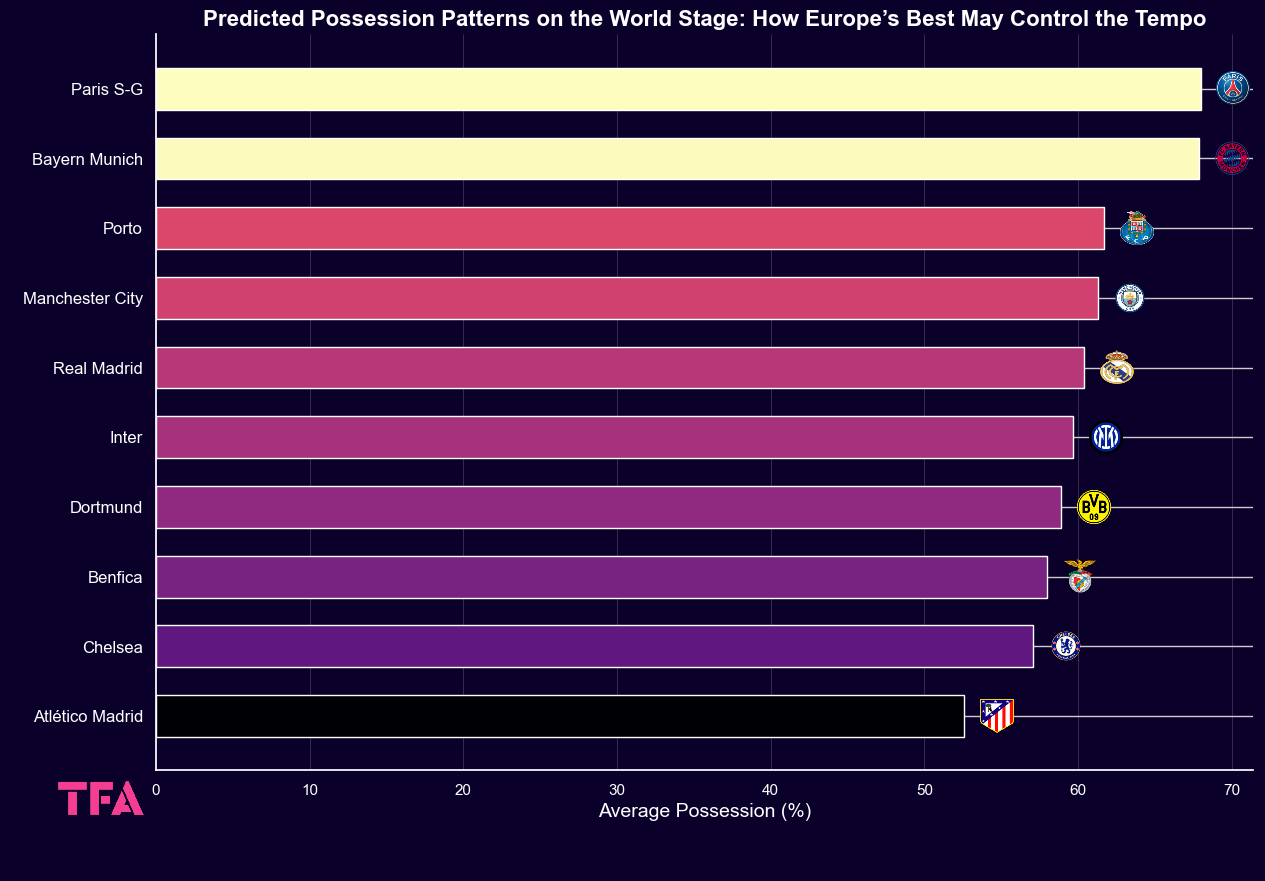

In [53]:
df = df.sort_values("Poss", ascending=False).head(10).reset_index(drop=True)

teams = df['Club']
values = df['Poss']

fig, ax = plt.subplots(figsize=(13, 9))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

bar_width = 0.6
indices = np.arange(len(teams))

norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.magma(norm(values))

bars = ax.barh(indices, values, height=bar_width, color=colors)

ax.set_yticks(indices)
ax.set_yticklabels(teams, color='white', fontsize=12)
ax.set_xlabel('Average Possession (%)', fontsize=14, color='white')
ax.set_title('Predicted Possession Patterns on the World Stage: How Europe’s Best May Control the Tempo',
             fontsize=16, color='white', weight='bold')
ax.invert_yaxis()

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(True, axis='x', color='white', linestyle='-', linewidth=0.4, alpha=0.3)

logos_path = "D:/Work/Data Analysis TFA/08 CWC European Teams/logos/"

for i, team in enumerate(teams):
    logo_file = f"{team}.png"
    logo_path = os.path.join(logos_path, logo_file)
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA")
        logo_img = logo_img.resize((80, 80))
        imagebox = OffsetImage(logo_img, zoom=0.3)
        ab = AnnotationBbox(imagebox, (values[i] + 1, i), frameon=False, box_alignment=(0, 0.5), xycoords='data')
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()


Squad Utilisation and Depth Projections: Comparing Minutes Played and Starting Appearances Before Kickoff

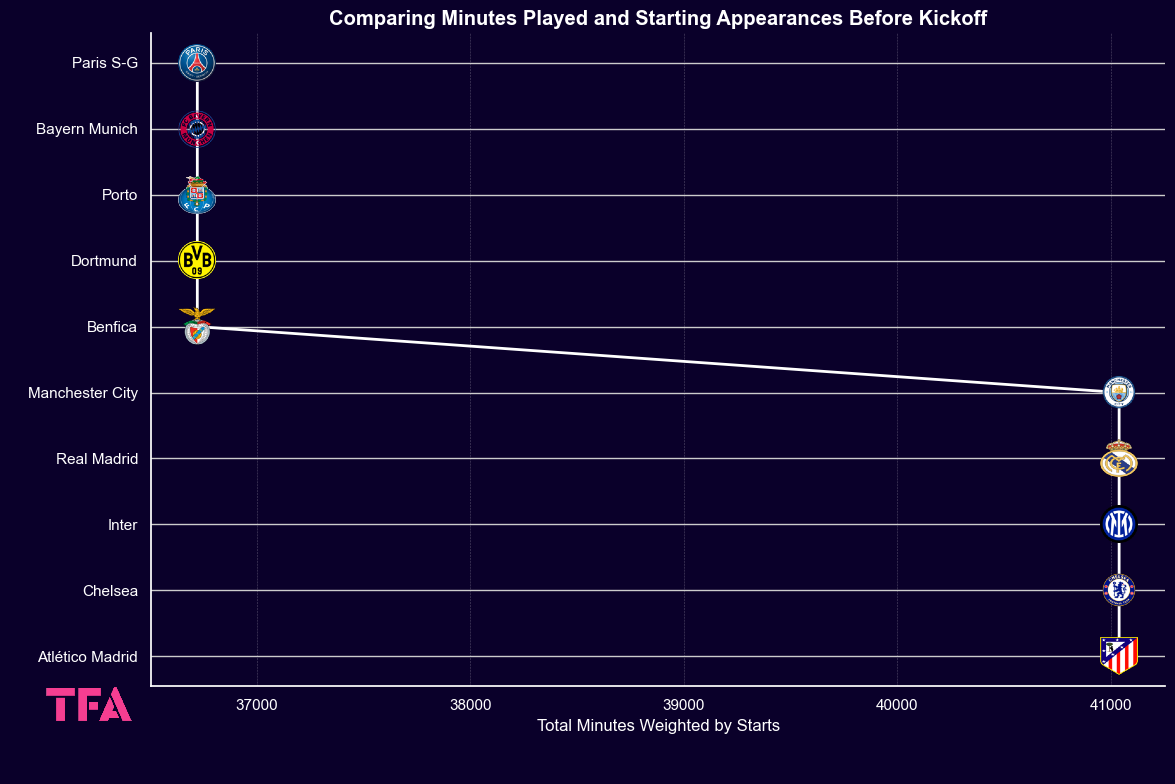

In [59]:
df["Utilisation"] = df["Min"] + (df["Starts"] * 90)
df = df.sort_values("Utilisation", ascending=True).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

x = df["Utilisation"].values
y = np.arange(len(df)) 

ax.plot(x, y, color='white', linewidth=2, linestyle='-', marker='o', markersize=0)

norm = plt.Normalize(df["Utilisation"].min(), df["Utilisation"].max())
colors = plt.cm.magma(norm(x))
scatter = ax.scatter(x, y, c=colors, s=100, edgecolors='white', zorder=3)

ax.set_yticks(y)
ax.set_yticklabels(df["Club"], color='white', fontsize=11)
ax.set_xlabel('Total Minutes Weighted by Starts', fontsize=12, color='white')
ax.set_title('Comparing Minutes Played and Starting Appearances Before Kickoff',
             fontsize=14.5, color='white', weight='bold')
ax.invert_yaxis()

ax.tick_params(axis='x', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(True, axis='x', color='white', linestyle='--', linewidth=0.4, alpha=0.3)

logos_path = "D:/Work/Data Analysis TFA/08 CWC European Teams/logos/"

for i, club in enumerate(df['Club']):
    logo_path = os.path.join(logos_path, f"{club}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA")
        logo_img = logo_img.resize((60, 60)) 
        imagebox = OffsetImage(logo_img, zoom=0.452)
        ab = AnnotationBbox(imagebox, (x[i], y[i]),
                            frameon=False, box_alignment=(0.5, 0.5), xycoords='data', pad=0)
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Discipline Expectations Under Pressure: Anticipating Cards and Aggression in Knockout Stages

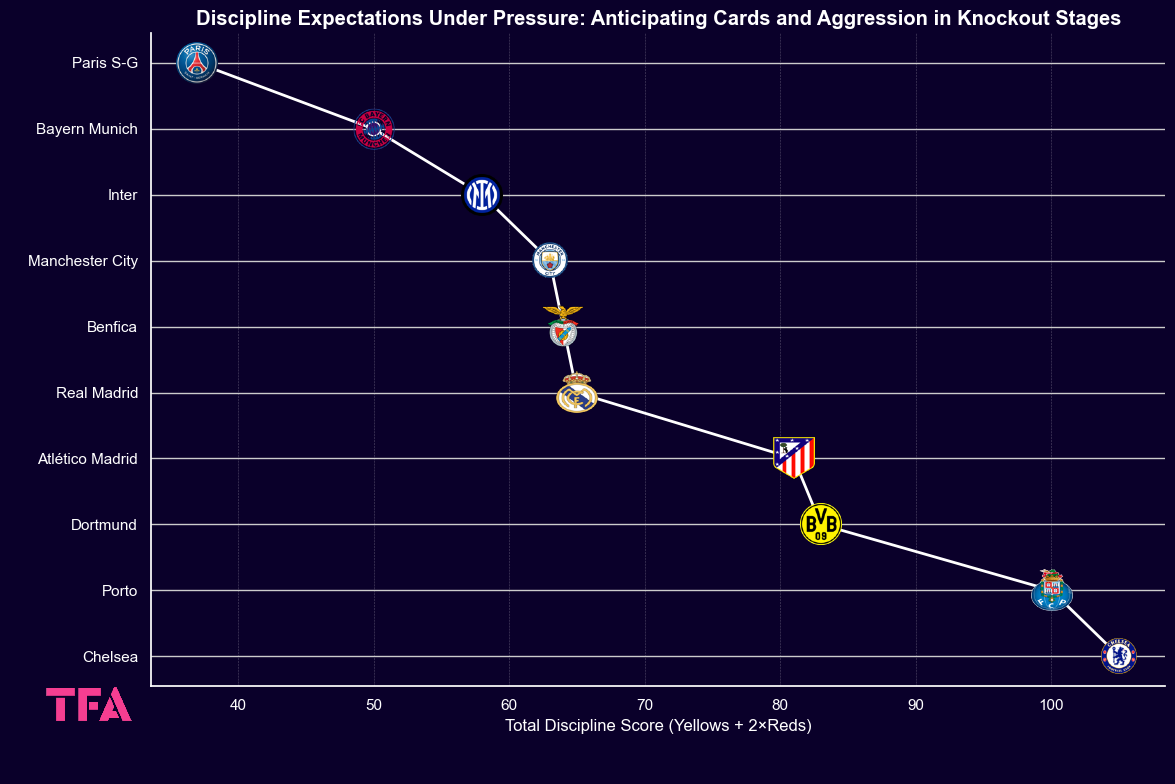

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df["Cards_Total"] = df["CrdY"] + (df["CrdR"] * 2)
df = df.sort_values("Cards_Total", ascending=True).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

x = df["Cards_Total"].values
y = np.arange(len(df))

ax.plot(x, y, color='white', linewidth=2, linestyle='-', marker='o', markersize=0)

norm = plt.Normalize(df["Cards_Total"].min(), df["Cards_Total"].max())
colors = plt.cm.magma(norm(x))
scatter = ax.scatter(x, y, c=colors, s=100, edgecolors='white', zorder=3)

ax.set_yticks(y)
ax.set_yticklabels(df["Club"], color='white', fontsize=11)
ax.set_xlabel('Total Discipline Score (Yellows + 2×Reds)', fontsize=12, color='white')
ax.set_title('Discipline Expectations Under Pressure: Anticipating Cards and Aggression in Knockout Stages',
             fontsize=14.5, color='white', weight='bold')
ax.invert_yaxis()

ax.tick_params(axis='x', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(True, axis='x', color='white', linestyle='--', linewidth=0.4, alpha=0.3)

logos_path = "D:/Work/Data Analysis TFA/08 CWC European Teams/logos/"

for i, club in enumerate(df['Club']):
    logo_path = os.path.join(logos_path, f"{club}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA")
        logo_img = logo_img.resize((60, 60))
        imagebox = OffsetImage(logo_img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (x[i], y[i]),
                            frameon=False, box_alignment=(0.5, 0.5), xycoords='data', pad=0)
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()


Role of Penalties in the Tournament: How Much Might Top Clubs Rely on Spot Kicks?

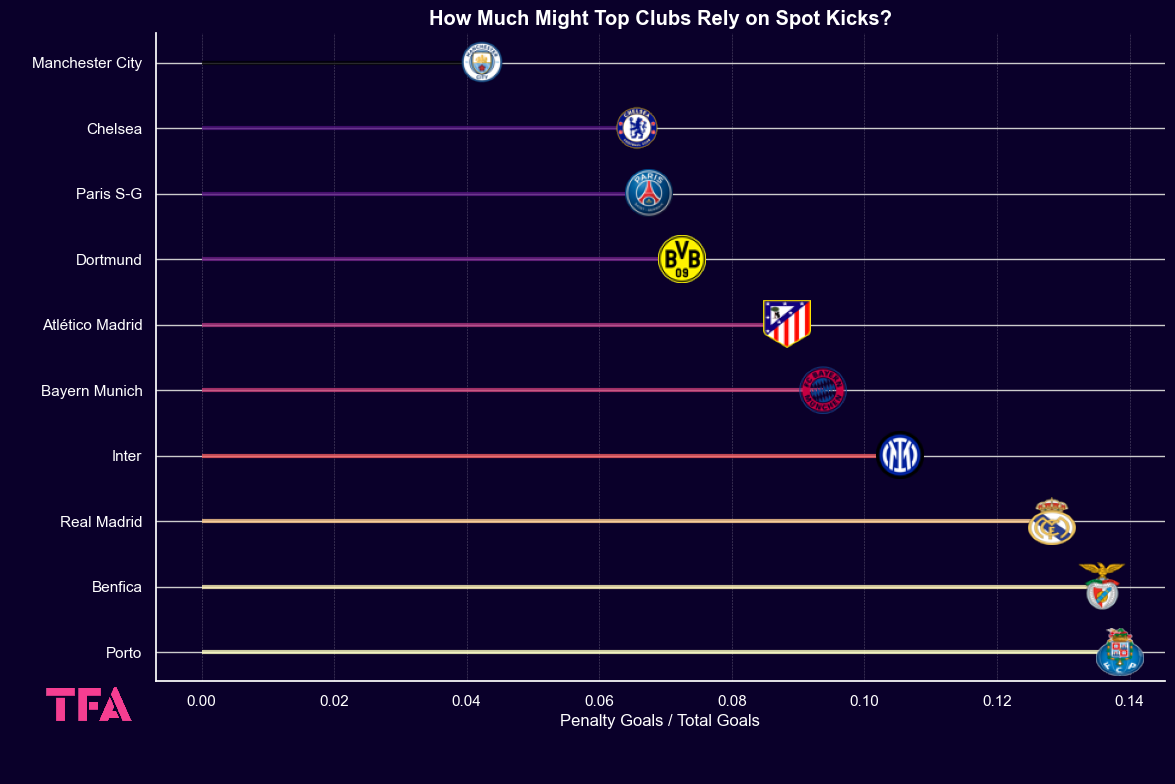

In [66]:
df["PK_Reliance"] = df["PK"] / df["Gls"]
df = df.replace([np.inf, -np.inf], 0).fillna(0)
df = df.sort_values("PK_Reliance", ascending=True).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

y = np.arange(len(df))
x = df["PK_Reliance"].values

norm = plt.Normalize(df["PK_Reliance"].min(), df["PK_Reliance"].max())
colors = plt.cm.magma(norm(x))

ax.hlines(y, 0, x, color=colors, alpha=0.8, linewidth=3)

ax.set_yticks(y)
ax.set_yticklabels(df["Club"], fontsize=11, color='white')

ax.set_xlabel('Penalty Goals / Total Goals', fontsize=12, color='white')
ax.set_title('How Much Might Top Clubs Rely on Spot Kicks?', fontsize=14.5, color='white', weight='bold')

ax.invert_yaxis()

ax.tick_params(axis='x', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(True, axis='x', color='white', linestyle='--', linewidth=0.4, alpha=0.3)

logos_path = "D:/Work/Data Analysis TFA/08 CWC European Teams/logos/"

for i, club in enumerate(df['Club']):
    logo_path = os.path.join(logos_path, f"{club}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA")
        logo_img = logo_img.resize((40, 40))
        imagebox = OffsetImage(logo_img, zoom=0.85)
        ab = AnnotationBbox(imagebox, (x[i], y[i]), frameon=False, box_alignment=(0.5, 0.5), xycoords='data')
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)


plt.tight_layout()
plt.show()


Expected vs Potential Performance: Comparing xG Metrics with Actual Outcomes from Recent Seasons

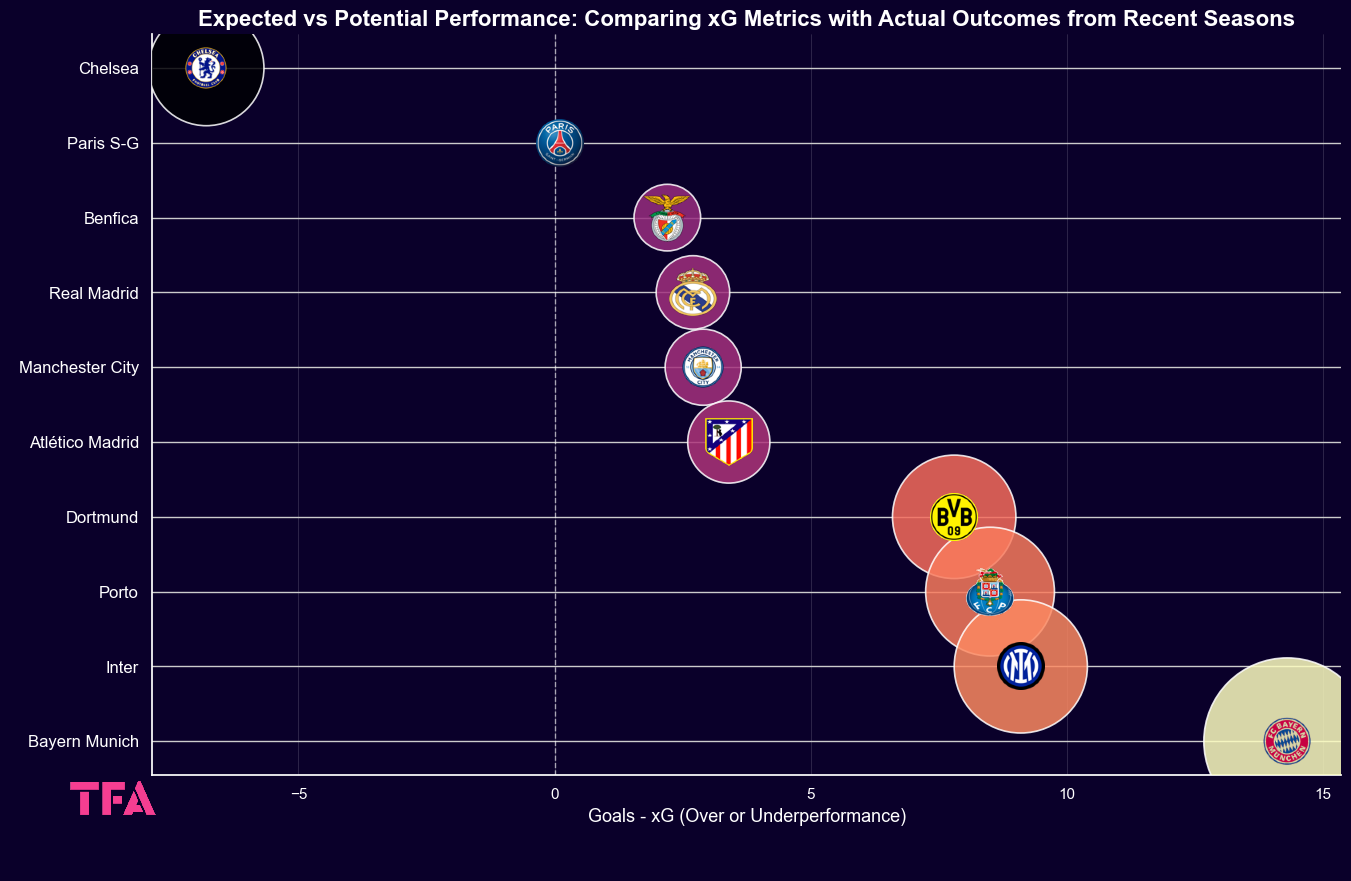

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df["xG_Diff"] = df["Gls"] - df["xG"]
df = df.sort_values("xG_Diff", ascending=True).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(14, 9))
ax.set_facecolor('#0A002A')
fig.patch.set_facecolor('#0A002A')

y = np.arange(len(df))
x = df["xG_Diff"].values

norm = plt.Normalize(df["xG_Diff"].min(), df["xG_Diff"].max())
colors = plt.cm.magma(norm(x))

sizes = (np.abs(x) * 1000) + 100 

ax.axvline(0, color='white', linestyle='--', linewidth=1, alpha=0.6)

sc = ax.scatter(x, y, s=sizes, c=colors, alpha=0.85, edgecolors='white', linewidth=1.2, zorder=3)

ax.set_yticks(y)
ax.set_yticklabels(df["Club"], fontsize=12, color='white')

ax.set_xlabel('Goals - xG (Over or Underperformance)', fontsize=13, color='white')
ax.set_title('Expected vs Potential Performance: Comparing xG Metrics with Actual Outcomes from Recent Seasons',
             fontsize=16, color='white', weight='bold')

ax.invert_yaxis()

ax.tick_params(axis='x', colors='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(True, axis='x', color='white', linestyle='-', linewidth=0.4, alpha=0.25)

logos_path = "D:/Work/Data Analysis TFA/08 CWC European Teams/logos/"

for i, club in enumerate(df['Club']):
    logo_path = os.path.join(logos_path, f"{club}.png")
    if os.path.exists(logo_path):
        logo_img = Image.open(logo_path).convert("RGBA")
        logo_img = logo_img.resize((60, 60))
        imagebox = OffsetImage(logo_img, zoom=0.575)
        ab = AnnotationBbox(imagebox, (x[i], y[i]), frameon=False, box_alignment=(0.5, 0.5), xycoords='data', pad=0)
        ax.add_artist(ab)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.12, 0.03), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()
